# DBscan

DBSCAN (agrupación espacial de aplicaciones con ruido basado en densidad) es un algoritmo de agrupación no supervisado de uso común propuesto en 1996. A diferencia de la media K más conocida, DBSCAN no necesita especificar el número de agrupaciones. Puede detectar automáticamente la cantidad de clústeres en función de sus datos y parámetros de entrada. Más importante aún, DBSCAN puede encontrar agrupaciones de formas arbitrarias que k-means no pueden encontrar. Por ejemplo, un grupo rodeado por un grupo diferente.

Diferencia entre kmeans y dbscan

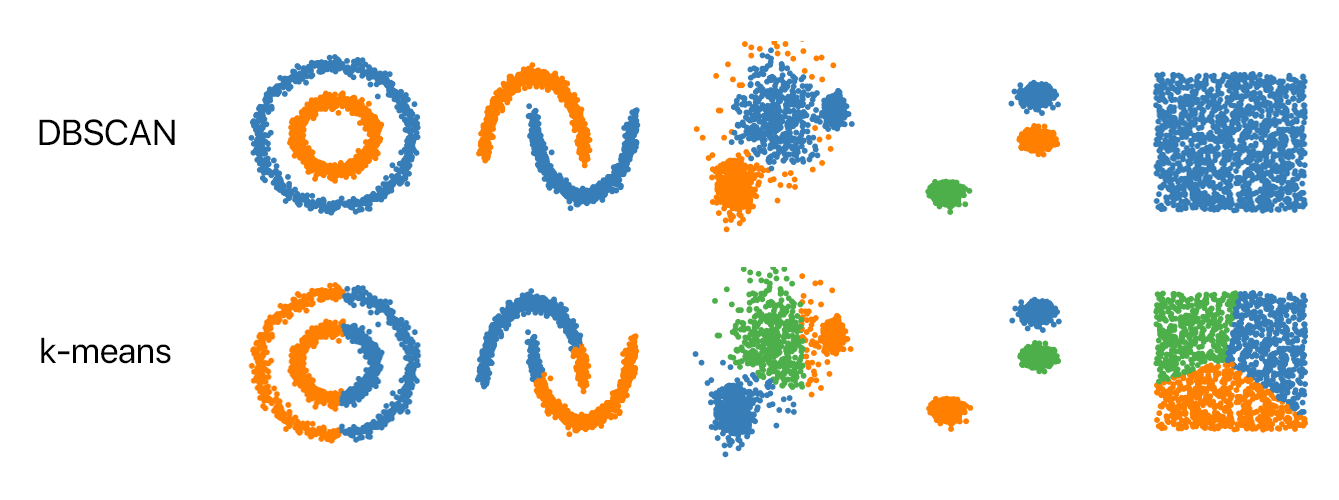

## Parámetros de configuración

Cuenta con dos parámetros de configuración:

- **Eps ($\epsilon$):** Radio máximo del vecino mas cercano
- **minPts:** Número mínimo de puntos en un vecindario Eps de ese punto

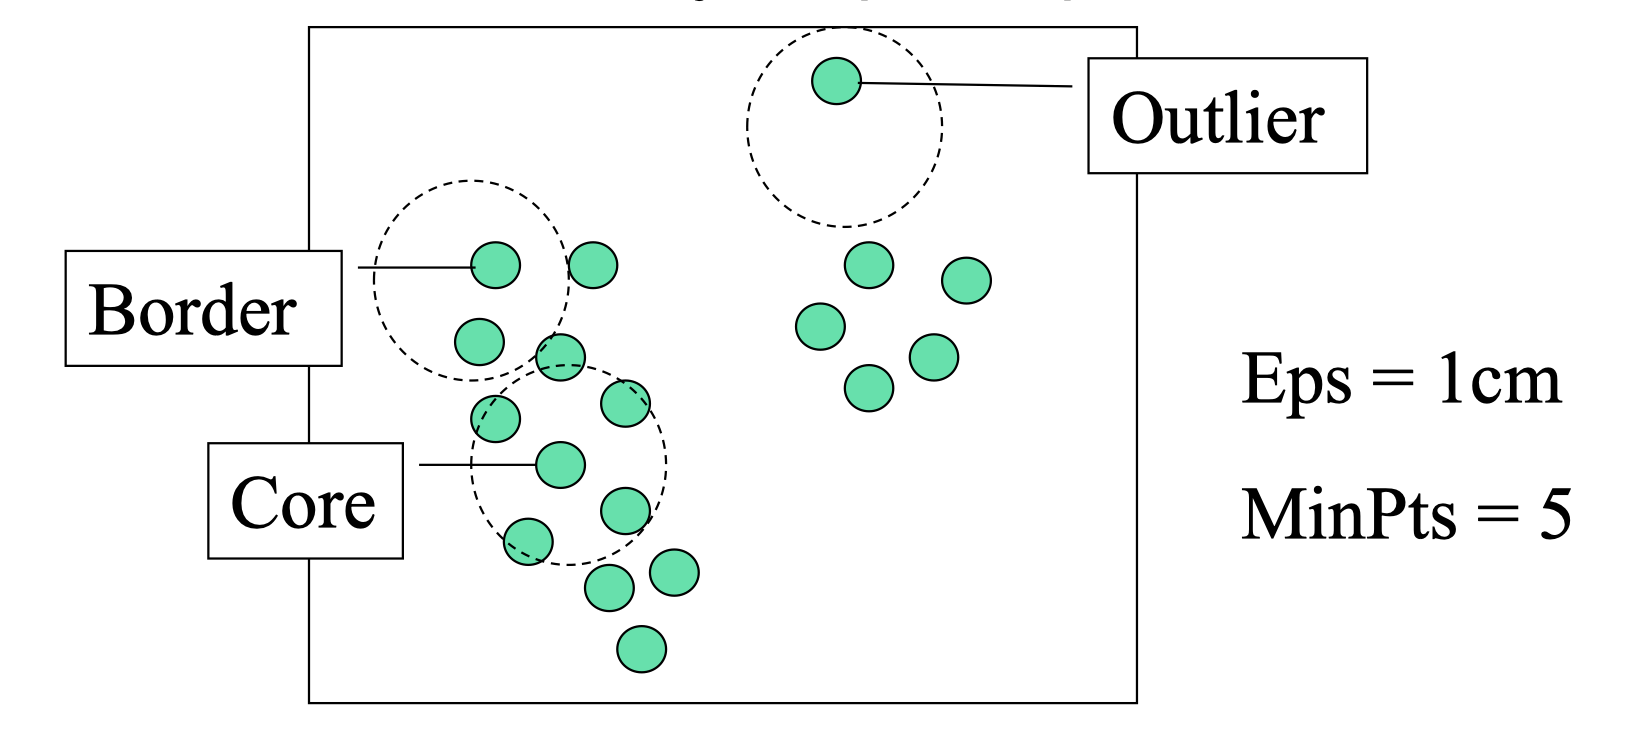

## Otras 3 características

- **Core point**: los puntos rojos son puntos centrales que tienen al menos MinPts = 4 en su vecindario.

- **Border point:** un punto seleccionado que se encuentra dentro de una vecindad de un punto central, pero no puede ser un punto central en sí mismo. En la figura los puntos amarillos son fronterizos.

- **Noisy point:** un punto seleccionado que no es un punto central ni un punto fronterizo. Significa que estos puntos son valores atípicos que no están asociados con ningún grupo denso. En la figura, el punto morado se identifica como punto de ruido.

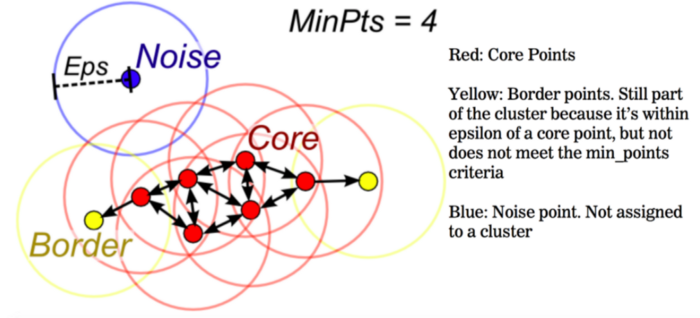

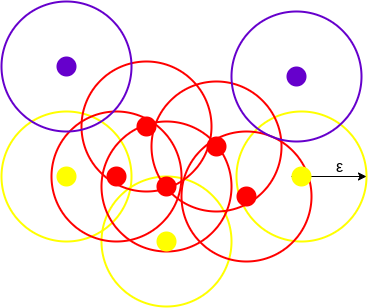

## Algoritmo

1. Seleccione un punto $p$ arbitrario.
2. Recupere todos los puntos de densidad alcanzables desde $p$ basado en Eps y MinPts.
3. Si $p$ es un punto central, se forma un grupo
4. Si $p$ es un punto fronterizo, no se puede alcanzar la densidad de ningún punto desde $p$ y DBSCAN visita el siguiente punto de la base de datos.
5. Continúe el proceso hasta que se hayan procesado todos los puntos

## Implementación en python

In [38]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Creacion de funcion de datos random
np.random.seed(42)

# Crea puntos tipo circulo
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [5]:
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Insertando ruido en el dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

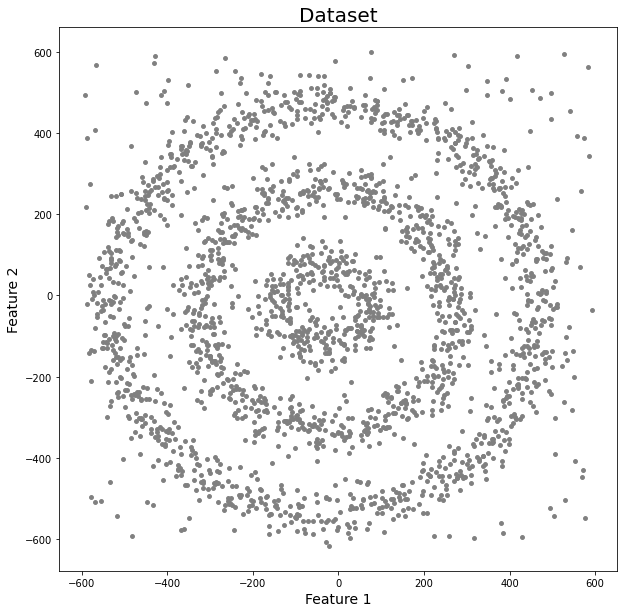

In [6]:
#  Visualizacion inicial

plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [7]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [10]:
# Entender la cantidad optima de puntos minimos centrales
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

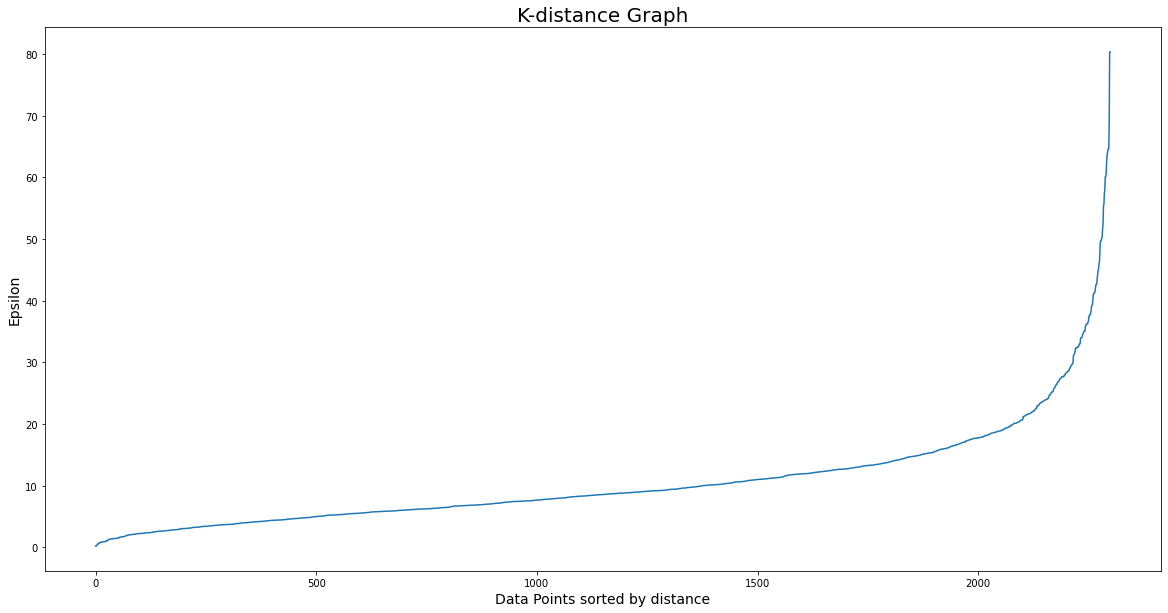

In [39]:
# Graficar el k-graph para ver distancias optimas
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [11]:
dbscan_opt = DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(algorithm='auto', eps=30, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [16]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 6    737
 0    655
 7    316
 2    251
-1    223
 1     62
 5     47
 4      5
 3      4
Name: DBSCAN_opt_labels, dtype: int64

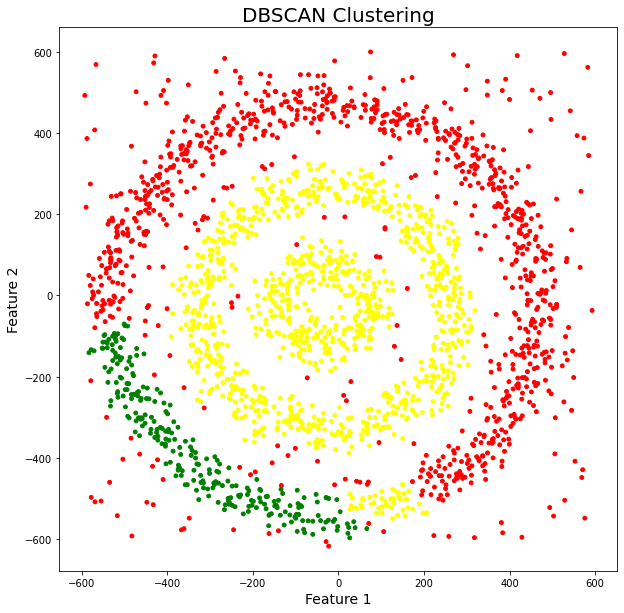

In [20]:
# Plotting the resulting clusters
colors = ["red", "green", 'yellow']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# Mean shift

Mean Shift es un algoritmo de agrupamiento jerárquico. A diferencia de los algoritmos de aprendizaje automático supervisados, la agrupación intenta agrupar datos sin haber sido entrenados primero en datos etiquetados.

Defina una ventana (ancho de banda del kernel) y coloque la ventana en un punto de datos

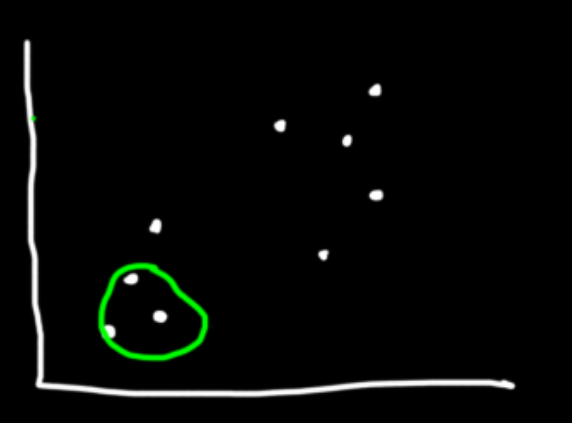

Calcule la media de todos los puntos en la ventana.

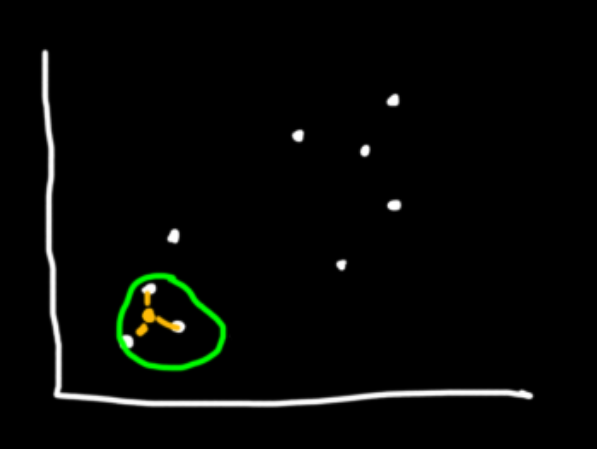

Mueva el centro de la ventana a la ubicación de la media.

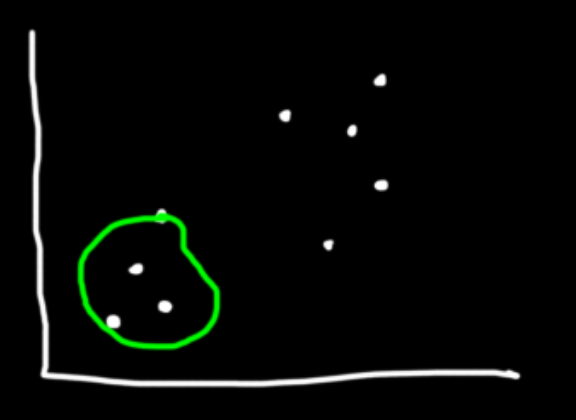

Repita los pasos 2 y 3 hasta que haya convergencia en los datos y clusters completos

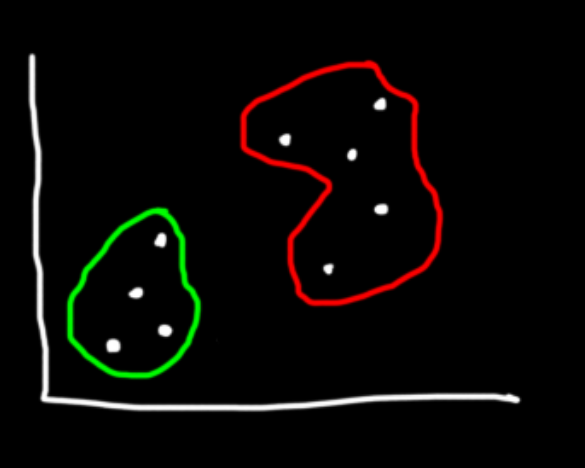

## Implementación en python

In [40]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [42]:
clusters = [[1,1,1],[5,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 150, centers = clusters, cluster_std = 0.60)

In [43]:
ms = MeanShift()
ms.fit(X)
cluster_centers = ms.cluster_centers_

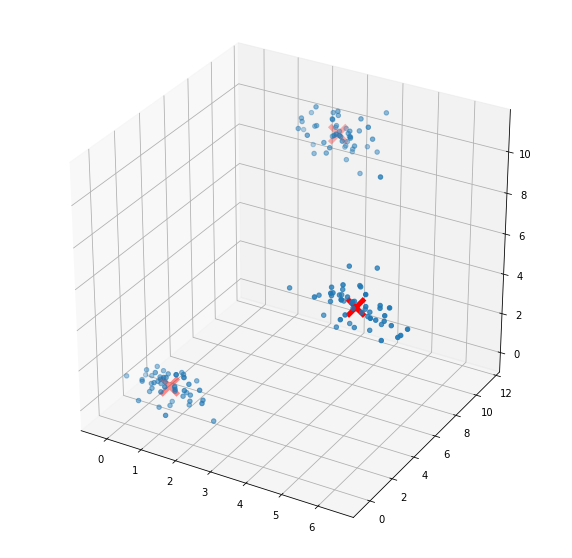

In [45]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], marker='x', color='red', s=300, linewidth=5, zorder=10)
plt.show()